<a href="https://colab.research.google.com/github/Sahithivijayam/PDS_Assignment_3/blob/main/PDS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

*768 columns and 9 rows*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**a)Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.**

In [6]:
# Population statistics
#Finding mean and max of glucose variable
pop_glucose_mean = df['Glucose'].mean()
pop_glucose_max = df['Glucose'].max()

In [7]:
# Sample of 25 with seed
np.random.seed(42)
sample_df = df.sample(n=25, random_state=42)

In [8]:
sample_glucose_mean = sample_df['Glucose'].mean()
sample_glucose_max = sample_df['Glucose'].max()


In [9]:
# Print statistics
print("Population Mean Glucose:", pop_glucose_mean)
print("Sample Mean Glucose:", sample_glucose_mean)
print("Population Max Glucose:", pop_glucose_max)
print("Sample Max Glucose:", sample_glucose_max)


Population Mean Glucose: 120.89453125
Sample Mean Glucose: 116.64
Population Max Glucose: 199
Sample Max Glucose: 183


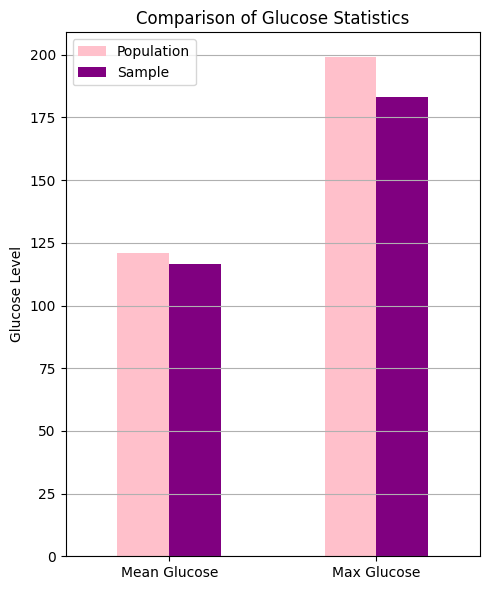

In [10]:
# comparison plot
plt.figure(figsize=(5,6))
bar_data = pd.DataFrame({
    'Population': [pop_glucose_mean, pop_glucose_max],
    'Sample': [sample_glucose_mean, sample_glucose_max]
}, index=['Mean Glucose', 'Max Glucose'])
bar_data.plot(kind='bar', ax=plt.gca(),color=['pink','purple'])
plt.title("Comparison of Glucose Statistics")
plt.ylabel("Glucose Level")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*The sample mean is slightly lower than the population mean.*

*The maximum value in the sample is also a bit lower than the population's maximum.*

**Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

In [15]:
population_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)

In [17]:
print("Population 98th Percentile BMI:", population_bmi_98)
print("Sample 98th Percentile BMI:", sample_bmi_98)

Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 40.248


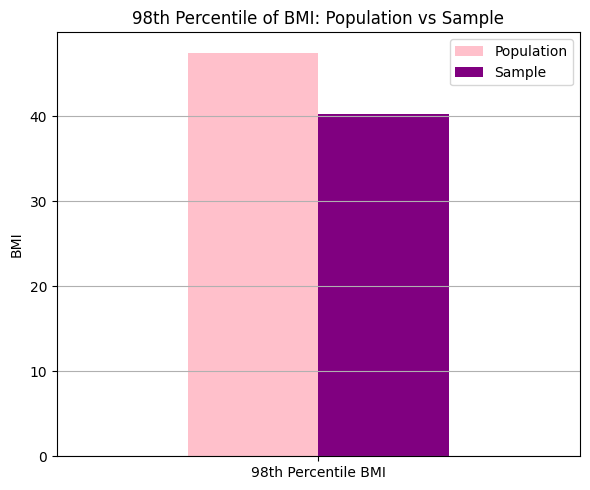

In [38]:
# Plot comparison
plt.figure(figsize=(6, 5))
bar_data_bmi = pd.DataFrame({
    'Population': [population_bmi_98],
    'Sample': [sample_bmi_98]
}, index=['98th Percentile BMI'])

bar_data_bmi.plot(kind='bar', ax=plt.gca(), color=['pink', 'purple'])
plt.title("98th Percentile of BMI: Population vs Sample")
plt.ylabel("BMI")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*For the population, the 98th percentile of BMI gives a threshold that only 2% of patients exceed.*

*For the sample of 25, due to the smaller size, the 98th percentile might be less stable and more sensitive to extreme values.*

*In the small sample, 98% of patients fall below 47.2, indicating the sample might slightly underrepresent the very high BMI values compared to the full population.*

**Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.**

In [20]:
# Bootstrap settings
n_bootstrap = 500
sample_size = 150
bloodp_means = []
bloodp_stds = []
bloodp_98s = []

In [21]:
for _ in range(n_bootstrap):
    bootstrap_sample = df.sample(n=sample_size, replace=True)
    bloodp_means.append(bootstrap_sample['BloodPressure'].mean())
    bloodp_stds.append(bootstrap_sample['BloodPressure'].std())
    bloodp_98s.append(np.percentile(bootstrap_sample['BloodPressure'], 98))

In [22]:
# Compute average statistics from bootstraps
boot_mean = np.mean(bloodp_means)
boot_std = np.mean(bloodp_stds)
boot_98th = np.mean(bloodp_98s)

# Population statistics for BloodPressure
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std = df['BloodPressure'].std()
pop_bp_98 = np.percentile(df['BloodPressure'], 98)

# Print results
print("Bootstrap Mean BP:", boot_mean)
print("Population Mean BP:", pop_bp_mean)
print("Bootstrap Std Dev BP:", boot_std)
print("Population Std Dev BP:", pop_bp_std)
print("Bootstrap 98th Percentile BP:", boot_98th)
print("Population 98th Percentile BP:", pop_bp_98)

Bootstrap Mean BP: 69.17692000000001
Population Mean BP: 69.10546875
Bootstrap Std Dev BP: 19.073717755676082
Population Std Dev BP: 19.355807170644777
Bootstrap 98th Percentile BP: 97.90244000000003
Population 98th Percentile BP: 99.31999999999994


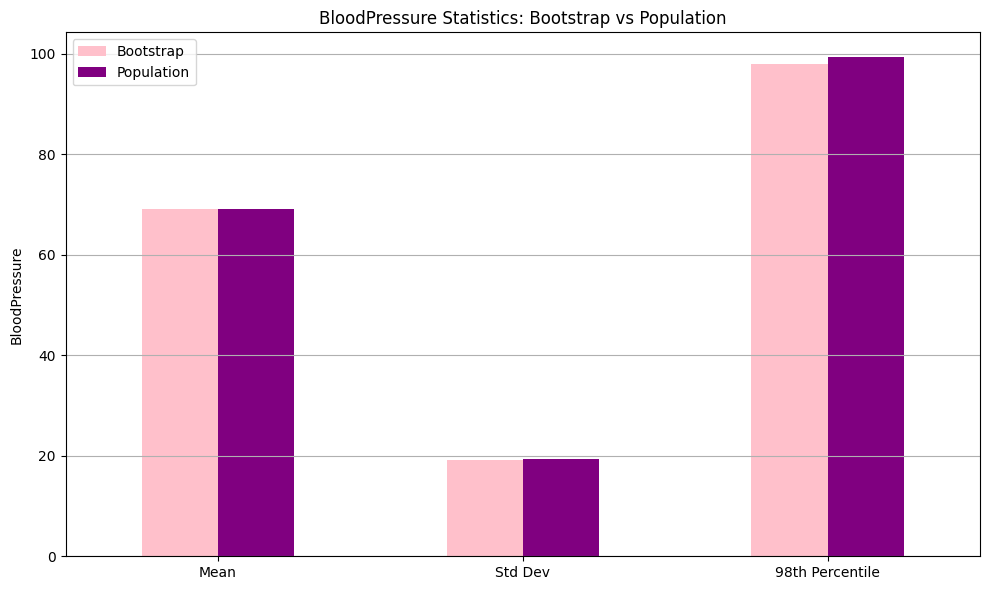

In [27]:
# Plot comparisons
comparison_df = pd.DataFrame({
    'Bootstrap': [boot_mean, boot_std, boot_98th],
    'Population': [pop_bp_mean, pop_bp_std, pop_bp_98]
}, index=['Mean', 'Std Dev', '98th Percentile'])

plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', ax=plt.gca(), color=['pink', 'purple'])
plt.title("BloodPressure Statistics: Bootstrap vs Population")
plt.ylabel("BloodPressure")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
